Hi Barbara, this question was to work the problem on pen and paper.  You will take the function,
which is r, you have to integrate it like I show on the slide (I sent a separate pdf scan to show
                                                  the full worked example).
This is the CDF.  
you calculated ds/dr,  obtain dr/ds and so find the function s given r.  (you divide by
                                                                         1/(L-1)).
                                                                         
It is difficult to understand what to do, since you did not see what I did in the class.



As such, I don't understand what you have done here very well, but it is not problem 2. 

Some comments anyway:
you could plot your image using the histogram transformation at the end of this code. 
You would see the image before and after.
Normally we use hist. eq. to improve an image with poor contrast.  I think that in this 
case the problem is not poor contrast.  

I have used medical images that are photos (e.g opthalmology) and then we have problems that you 
might have with normal photographs, like a small dynamic range of the gray levels being used. 
In a CT or MR image, the problem is more that there are too many levels to show, and the 
solution would be to take various ranges and plot them separately -> windowing / janelamento.



In [4]:
import numpy as np

import imageio
import cv2 as openCV
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [10]:
PIG_IMG = imageio.imread('scripts/PIG_MR')
METADATA = PIG_IMG.meta

In [58]:
'''
functionPr = (-2 * r + 2)/((L-1)**2) , se 0 <= r <= L-1
           = 0, se c.c

'''

def prFunc(array, L):
    result = []
    for r in array:
        if (0<= r <= L-1):
            result.append(abs((-2 * r + 2)/((L-1)**2))) 
        else:
            result.append(0)
    return result


In [59]:
arrayPig = PIG_IMG.ravel()
pxl = METADATA.Columns 

print(pxl)

512


In [60]:
pixelValues, grayLevels = np.histogram(PIG_IMG.ravel(), range(pxl)) # returns histogram and bins
prPig = prFunc(pixelValues, pxl)

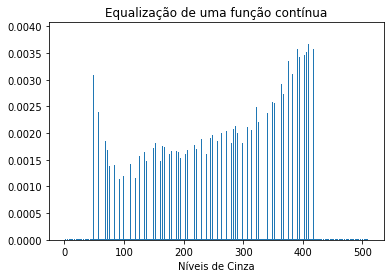

In [63]:
plt.bar(grayLevels[:-1], prPig, width=1, edgecolor='none')
plt.title('Equalização de uma função contínua')
plt.xlabel('Níveis de Cinza')
plt.show()